# Clean Data

### Imports

In [91]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# personal module scripts
import clean_data


## Clean NFL Combine Data

In [92]:
combine_file = r'data\nfl_combine_1987_2020.csv'

df_raw_combine = pd.read_csv(combine_file)

df_raw_combine.head()

# Keep raw data import for reference - build copy to modify
df_combine = df_raw_combine

# Drop dummy '0' column and Wonderlic scores data
combine_cols_to_drop = ['Unnamed: 0', 'Wonderlic']
df_combine.drop(columns=combine_cols_to_drop, inplace=True)

# Clean column headers
df_combine.columns = df_combine.columns.str.lower()
df_combine.rename(columns={'college':'school'}, inplace=True)

# Clean school names
df_combine['school'] = df_combine['school'].str.strip()

# Drop years prior to 2000 (no draft data)
print(df_combine.shape)
df_combine.drop(df_combine[df_combine['year']<2000].index, inplace=True)
print('Cleaned combine size: ', df_combine.shape)
df_combine.head()

(12808, 15)
Cleaned combine size:  (8465, 15)


,year,name,school,pos,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,60yd shuttle
4343,2000,Darnell Alford,Boston College,OT,76.0,334,10.50,34.00,5.58,23.0,25.0,94.0,4.98,8.48,NaN
4344,2000,Kyle Allamon,Texas Tech,TE,74.5,253,9.88,31.00,5.01,NaN,29.0,104.0,4.49,7.29,12.47
4345,2000,Rashard Anderson,Jackson State (MS),CB,74.4,206,10.00,33.00,4.59,NaN,34.0,123.0,4.15,7.18,11.72
4346,2000,Corey Atkins,South Carolina,OLB,72.4,237,9.75,31.88,4.76,21.0,31.0,112.0,4.39,7.96,11.87
4347,2000,Reggie Austin,Wake Forest,CB,69.4,175,8.50,30.00,4.46,17.0,35.0,119.0,4.14,7.03,NaN


## Import position mapping data
The "combine" dataset maps players to very specific positions (ie, "Free Saftey" or "Outside Linebacker").

Map these granular positions to more standard positions. Also classify each position as "Offense" or "Defense", and indicate if the position is a "Skill" position or on the line of scrimmage.

In [93]:
df_positions = pd.read_csv('data/position_mapping.csv')
df_positions.head()

,pos,pos_group,offense_defense,line_or_skill
0,WR,WR,O,S
1,CB,CB,D,S
2,RB,RB,O,S
3,DE,DL,D,L
4,OT,OL,O,L


### Merge the draft and position mapping datasets

In [94]:
print('Granular position counts in combine dataset:')
print(df_combine['pos'].value_counts())

df_combine = df_combine.merge(df_positions,
                          how='left',
                          on='pos')

print('\nPosition Group counts after merging with position map:')
print(df_combine['pos_group'].value_counts())

df_combine.head()

Granular position counts in combine dataset:
WR     1095
CB      864
RB      700
DE      657
DT      647
OT      618
OLB     586
OG      528
TE      471
QB      470
ILB     350
FS      347
SS      298
C       253
FB      175
P       108
K        92
LB       91
S        53
LS       22
EDG      22
OL       10
DL        4
DB        3
NT        1
Name: pos, dtype: int64

Position Group counts after merging with position map:
OL    1409
DL    1331
WR    1095
LB    1027
CB     864
S      701
RB     700
TE     471
QB     470
K      200
FB     175
SN      22
Name: pos_group, dtype: int64


,year,name,school,pos,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,60yd shuttle,pos_group,offense_defense,line_or_skill
0,2000,Darnell Alford,Boston College,OT,76.0,334,10.50,34.00,5.58,23.0,25.0,94.0,4.98,8.48,NaN,OL,O,L
1,2000,Kyle Allamon,Texas Tech,TE,74.5,253,9.88,31.00,5.01,NaN,29.0,104.0,4.49,7.29,12.47,TE,O,S
2,2000,Rashard Anderson,Jackson State (MS),CB,74.4,206,10.00,33.00,4.59,NaN,34.0,123.0,4.15,7.18,11.72,CB,D,S
3,2000,Corey Atkins,South Carolina,OLB,72.4,237,9.75,31.88,4.76,21.0,31.0,112.0,4.39,7.96,11.87,LB,D,S
4,2000,Reggie Austin,Wake Forest,CB,69.4,175,8.50,30.00,4.46,17.0,35.0,119.0,4.14,7.03,NaN,CB,D,S


#### Visualize combine performance distributions by position

['OL', 'TE', 'CB', 'LB', 'S', 'DL', 'QB', 'RB', 'WR', 'FB']
Unique Positions:  10
Index(['year', 'name', 'school', 'pos', 'height (in)', 'weight (lbs)',
       'hand size (in)', 'arm length (in)', '40 yard', 'bench press',
       'vert leap (in)', 'broad jump (in)', 'shuttle', '3cone', '60yd shuttle',
       'pos_group', 'offense_defense', 'line_or_skill'],
      dtype='object')


C:\Users\mitch\AppData\Local\Temp/ipykernel_13124/858193567.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


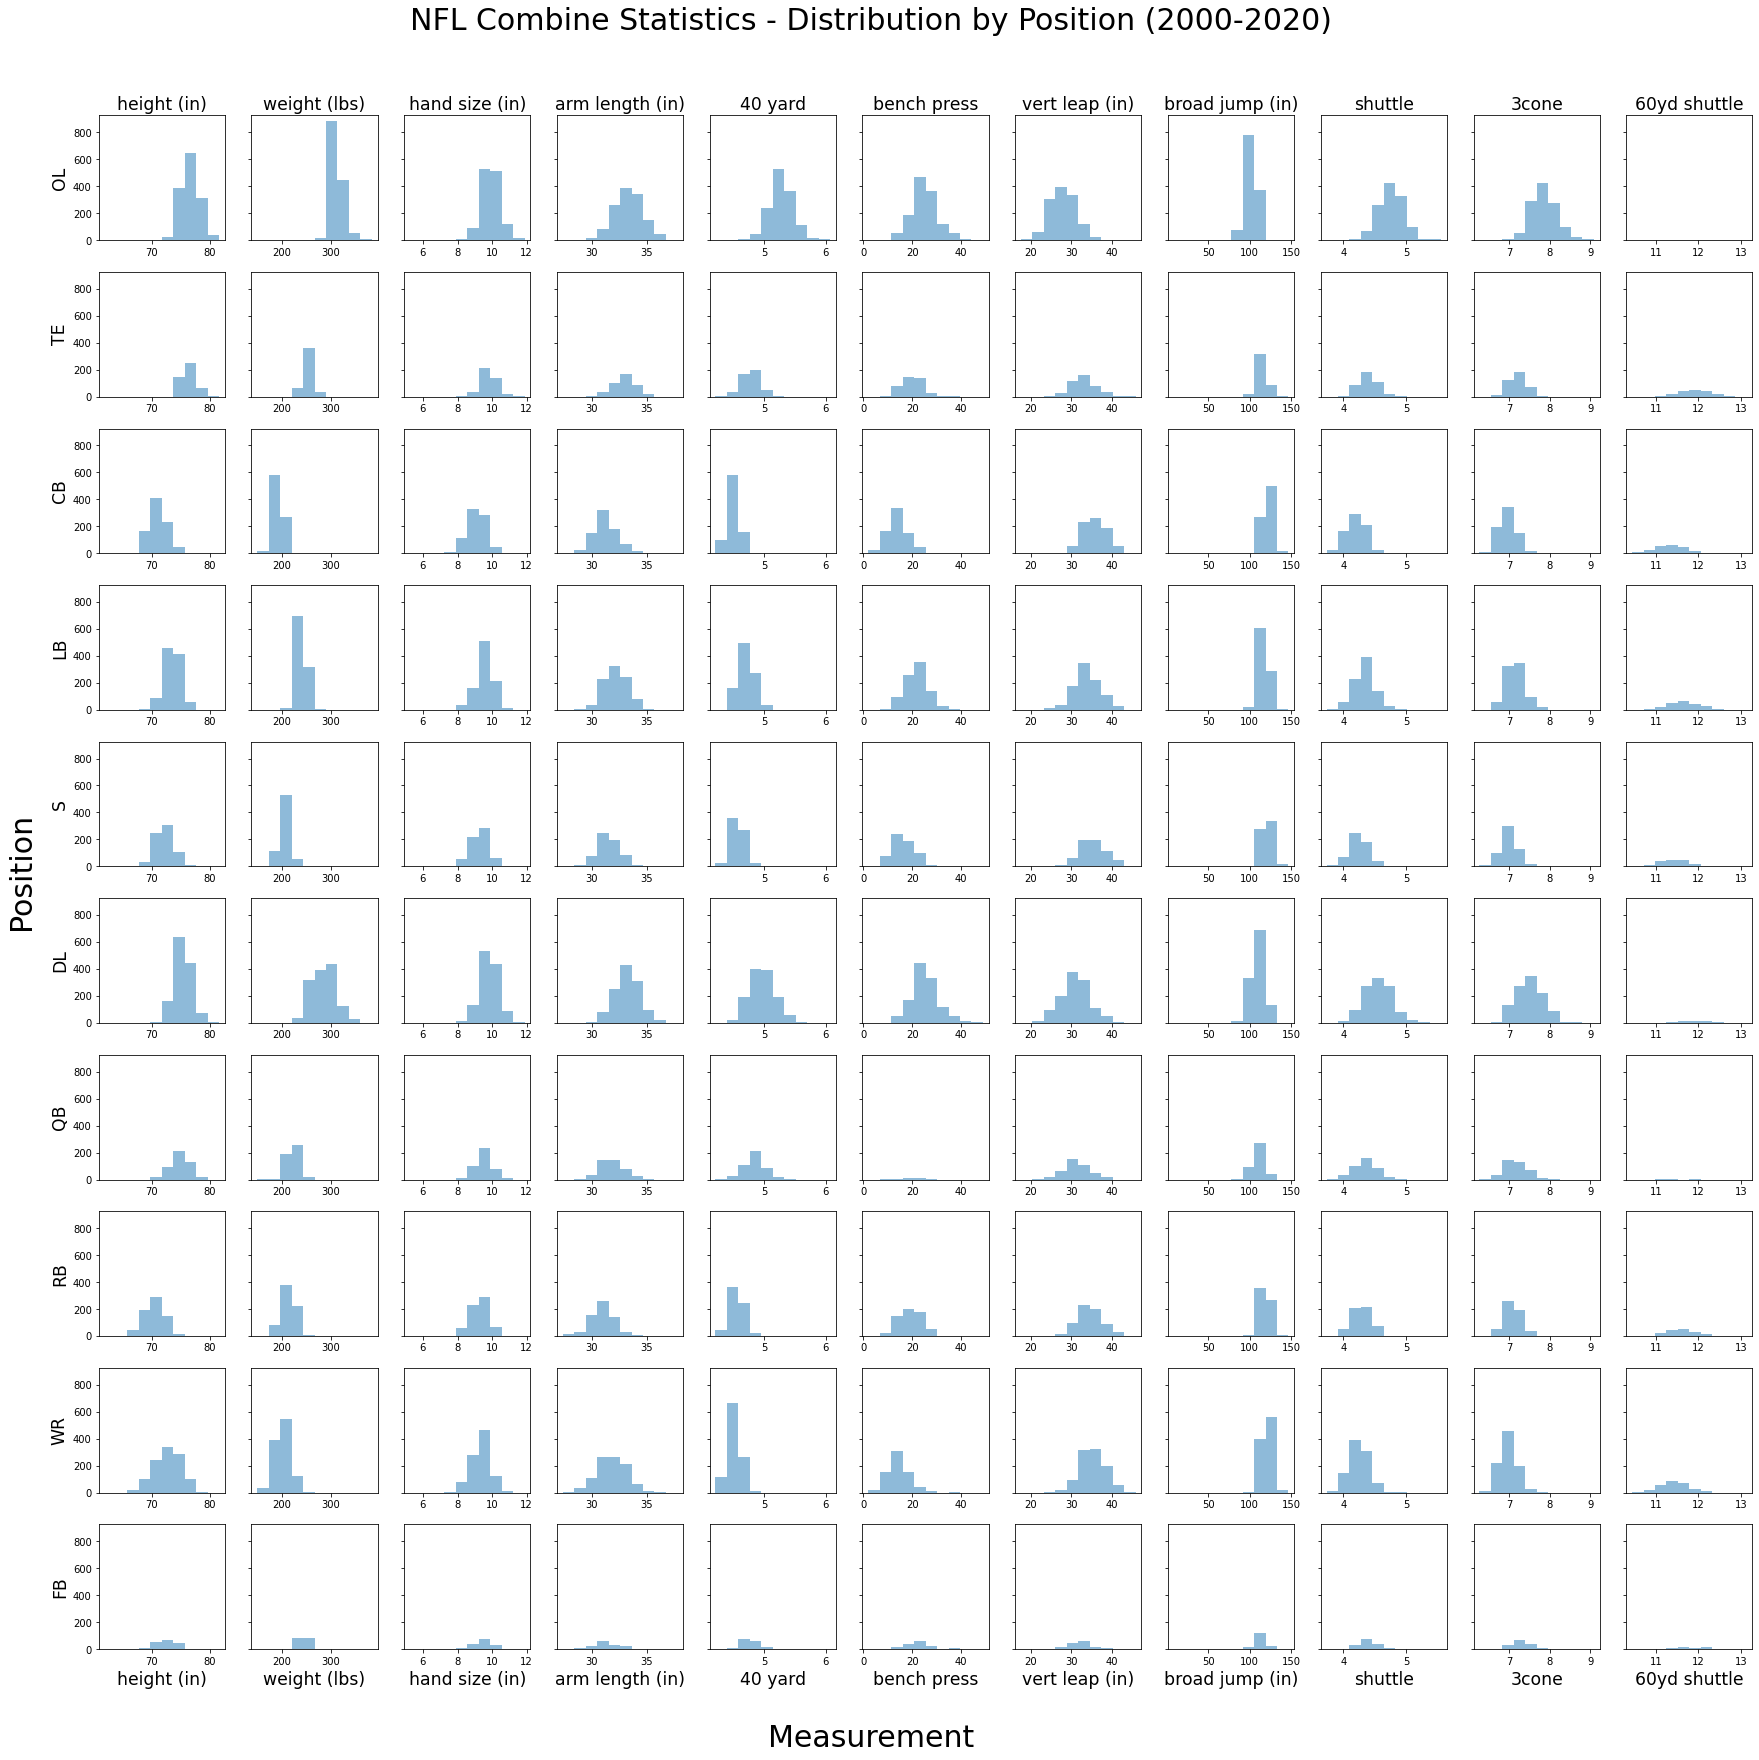

In [95]:
positions = df_combine['pos_group'].unique()

positions_to_drop = ['SN', 'K']   # Long snappers and kickers/punters

positions = [pos for pos in positions if pos not in positions_to_drop]
print(positions)


print('Unique Positions: ', len(positions))
print(df_combine.columns)
stat_columns = ['height (in)', 'weight (lbs)',
       'hand size (in)', 'arm length (in)', '40 yard', 'bench press',
       'vert leap (in)', 'broad jump (in)', 'shuttle', '3cone', '60yd shuttle']
num_stats = len(stat_columns)

fig, axes = plt.subplots(len(positions), num_stats,
                         sharex=False,
                         sharey=True,
                         figsize=(25,25))

fig.suptitle('NFL Combine Statistics - Distribution by Position (2000-2020)', fontsize=30)
fig.supxlabel('Measurement', fontsize=30)
fig.supylabel('Position', fontsize=30)

fig.tight_layout(rect=[0.03, 0.03, 1, .95])

# Loop over axes and data
for row, pos in enumerate(positions):
    x_positions = df_combine[df_combine['pos_group']==pos]

    for col, stat in enumerate(stat_columns):
        # Get axis
        ax = axes[row,col]
        x = x_positions[stat]
        ax.hist(x,
                range=[df_combine[stat].min(),df_combine[stat].max()],
                alpha=.5, bins=10)
        # Set Y label once per row
        if col==0:
            ax.set_ylabel(pos, fontsize='xx-large')

        # Set X label once per column
        if row == 0:
            ax.set_title(stat, fontsize='xx-large')
        if row == len(positions) - 1:
            ax.set_xlabel(stat, fontsize='xx-large')

fig.show()
fig.savefig('images/stats_by_position.png', format='png')


## Import and clean NFL Draft Data

In [96]:
draft_file = r'data\espn_draft_history_2000_2021_cleaned.csv'
df_raw_draft = pd.read_csv(draft_file)

# Keep raw data import for reference - build copy to modify
df_draft = df_raw_draft

# Clean column headers
df_draft.columns = df_draft.columns.str.lower()

# Clean school names
df_draft['school'] = df_draft['school'].str.strip()

### Are there duplicated names?

In [97]:
df_combine['name'].value_counts(sort='descending').head(10)

Brandon Williams    5
Chris Brown         5
Brian Allen         4
Mike Williams       4
Chris Jones         4
Michael Bennett     3
Josh Harris         3
Travis Wilson       3
Steve Smith         3
Andre Smith         3
Name: name, dtype: int64

### Answer: Yes

So we cannot simply join the 2 datasets on player 'name' columns. Need to also join on
college and year.


## Do college names match in both datasets?

In [98]:
draft_school = pd.DataFrame(df_draft['school'].unique()).rename(columns={0:'school'})
draft_school['source'] = 'draft'
combine_school = pd.DataFrame(df_combine['school'].unique()).rename(columns={0:'school'})
combine_school['source'] = 'combine'
print(type(combine_school))
print(combine_school.head())

schools = draft_school.merge(combine_school, on='school', how='outer',
                             suffixes=['_draft', '_combine']).sort_values(by='school')

# List all cases with mismatches
na_mask = schools.isna().any(axis=1)
schools[na_mask].head(10)

<class 'pandas.core.frame.DataFrame'>
               school   source
0      Boston College  combine
1          Texas Tech  combine
2  Jackson State (MS)  combine
3      South Carolina  combine
4         Wake Forest  combine


,school,source_draft,source_combine
202,Abilene Christian,draft,NaN
381,Abilene Christian (TX),NaN,combine
445,Adams State (CO),NaN,combine
345,Alabama-Birmingham,NaN,combine
200,Albany,draft,NaN
388,Albany (NY),NaN,combine
412,Alcorn State (MS),NaN,combine
133,Appalachian State,draft,NaN
336,Appalachian State (NC),NaN,combine
255,Ashland,draft,NaN


### So we see that the 'combine' dataset frequently has the state appended to the school name;
Ex: "Abilene Christian (TX)". Remove these from school names, with the exception of "Miami (OH).

In [99]:
df_combine['school'] = df_combine['school'].str.replace('Miami (OH)', 'Miami - OH')

print(df_combine['school'].head())
regex_replace_parens = r'\([^)]*[a-zA-Z][^)]*\)'
df_combine['school'] = df_combine['school'].str.replace(regex_replace_parens,
                                                        '', regex=True)

df_combine['school'].head()

0        Boston College
1            Texas Tech
2    Jackson State (MS)
3        South Carolina
4           Wake Forest
Name: school, dtype: object


C:\Users\mitch\AppData\Local\Temp/ipykernel_13124/172860408.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combine['school'] = df_combine['school'].str.replace('Miami (OH)', 'Miami - OH')


0    Boston College
1        Texas Tech
2    Jackson State 
3    South Carolina
4       Wake Forest
Name: school, dtype: object

## Standardize player names between datasets
Player names in the "Draft" dataset include suffixes including "Jr., II, III, IV", but these are NOT included in the "combine" dataset.

Standardize player names between datasets by removing these values from the "Draft" dataset.

In [100]:
regex_suffixes_to_remove = r'Jr\.$|III$|IIII$|IV$|, Jr.$'
df_draft['name'] = df_draft['name'].str.replace(regex_suffixes_to_remove,
                                                '', regex=True)

### Merge the Draft and NFL Combine datasets

In [101]:
df_merged = df_combine.merge(df_draft, how='left',
                             on=['name', 'school', 'year'])

df_merged.head()

# df_merged.to_clipboard()

,year,name,school,pos,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,...,shuttle,3cone,60yd shuttle,pos_group,offense_defense,line_or_skill,round,pk(ovr),team,position
0,2000,Darnell Alford,Boston College,OT,76.0,334,10.50,34.00,5.58,23.0,...,4.98,8.48,NaN,OL,O,L,6.0,22(188),Chiefs,OT
1,2000,Kyle Allamon,Texas Tech,TE,74.5,253,9.88,31.00,5.01,NaN,...,4.49,7.29,12.47,TE,O,S,NaN,NaN,NaN,NaN
2,2000,Rashard Anderson,Jackson State,CB,74.4,206,10.00,33.00,4.59,NaN,...,4.15,7.18,11.72,CB,D,S,NaN,NaN,NaN,NaN
3,2000,Corey Atkins,South Carolina,OLB,72.4,237,9.75,31.88,4.76,21.0,...,4.39,7.96,11.87,LB,D,S,NaN,NaN,NaN,NaN
4,2000,Reggie Austin,Wake Forest,CB,69.4,175,8.50,30.00,4.46,17.0,...,4.14,7.03,NaN,CB,D,S,4.0,31(125),Bears,DB


## Investigate merged data

In [102]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8464
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             8465 non-null   int64  
 1   name             8465 non-null   object 
 2   school           8462 non-null   object 
 3   pos              8465 non-null   object 
 4   height (in)      8465 non-null   float64
 5   weight (lbs)     8465 non-null   int64  
 6   hand size (in)   7639 non-null   float64
 7   arm length (in)  7638 non-null   float64
 8   40 yard          7922 non-null   float64
 9   bench press      6603 non-null   float64
 10  vert leap (in)   7503 non-null   float64
 11  broad jump (in)  7400 non-null   float64
 12  shuttle          6929 non-null   float64
 13  3cone            6827 non-null   float64
 14  60yd shuttle     1370 non-null   float64
 15  pos_group        8465 non-null   object 
 16  offense_defense  8465 non-null   object 
 17  line_or_skill 

## Data Cleaning:
* Very few 60-yard shuttle records; drop column
* Split the 'pk(ovr)' column to get a new "Overall" column.
    * Overwrite blank values in this column with '500' to reflect undrafted players
* Drop kickers, long snappers, QBs and Fullbacks (too few, draft status not driven by stats)

In [103]:
# Drop 60yd shuttle (too few data points), duplicative columns related to
# player position, and things like year and team name
merged_cols_to_drop = ['year', 'name', 'school', 'pos',
                       '60yd shuttle',
                       'round', 'team', 'position']

try:
    df_merged.drop(columns=merged_cols_to_drop, inplace=True)
except:
    print('Issue dropping columns')


# Make new "overall" column of draft status by extracting overall
# draft rank from between parentheses in the "pk(ovr)" column
regex_value_bw_parens = r'\((.*?)\)'
df_merged['overall'] = \
    df_merged['pk(ovr)'].str.extract(pat=regex_value_bw_parens).astype('float')

# print(df_merged['overall'].max()) # is 260



# Undrafter players will have "Nan" values. Set these to 500
# as a way to indicate undrafter players
# df_merged['overall'].fillna(500, inplace=True)

# Drop Undrafted
df_merged.dropna(inplace=True)
print(df_merged.head())
# Now drop the 'pk(ovr)' column
df_merged.drop(columns=['pk(ovr)'], inplace=True)




print('\n Remaining Columns')
print(df_merged.columns)

positions_to_drop = ['SN', 'K', 'QB', 'FB']
positions_mask = \
    df_merged[df_merged['pos_group'].isin(positions_to_drop)].index

print(positions_mask)

print(df_merged.shape)
df_merged.drop(positions_mask, inplace=True)
print(df_merged.head())


   height (in)  weight (lbs)  hand size (in)  arm length (in)  40 yard  \
0         76.0           334           10.50            34.00     5.58   
4         69.4           175            8.50            30.00     4.46   
5         77.9           312            9.25            32.75     5.36   
6         71.6           208            9.50            32.00     4.63   
7         69.9           199           10.00            31.13     4.48   

   bench press  vert leap (in)  broad jump (in)  shuttle  3cone pos_group  \
0         23.0            25.0             94.0     4.98   8.48        OL   
4         17.0            35.0            119.0     4.14   7.03        CB   
5         20.0            28.0             96.0     4.73   7.72        OL   
6         10.0            35.0            114.0     4.32   6.92         S   
7         16.0            37.5            116.0     4.04   6.81        CB   

  offense_defense line_or_skill  pk(ovr)  overall  
0               O             L  22(188)

### How many players don't have much combine data? Drop them

In [104]:
metrics_cols = ['height (in)', 'weight (lbs)', 'hand size (in)', 'arm length (in)',
       '40 yard', 'bench press', 'vert leap (in)', 'broad jump (in)',
       'shuttle', '3cone']

# See count of records by number of missing metrics values
# 10 total metrics values, drop if they don't have at least 8
print('\n Missing metrics per row')
print(df_merged[metrics_cols].isna().sum(axis=1).value_counts())
df_merged.dropna(axis=0, thresh=7,
                 subset=metrics_cols, inplace=True)
print('\nRemaining missing metrics by row')
print(df_merged[metrics_cols].isna().sum(axis=1).value_counts())

df_merged.head(10)


 Missing metrics per row
0    2124
dtype: int64

Remaining missing metrics by row
0    2124
dtype: int64


,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,pos_group,offense_defense,line_or_skill,overall
0,76.0,334,10.50,34.00,5.58,23.0,25.0,94.0,4.98,8.48,OL,O,L,188.0
4,69.4,175,8.50,30.00,4.46,17.0,35.0,119.0,4.14,7.03,CB,D,S,125.0
5,77.9,312,9.25,32.75,5.36,20.0,28.0,96.0,4.73,7.72,OL,O,L,247.0
6,71.6,208,9.50,32.00,4.63,10.0,35.0,114.0,4.32,6.92,S,D,S,225.0
7,69.9,199,10.00,31.13,4.48,16.0,37.5,116.0,4.04,6.81,CB,D,S,102.0
13,76.4,302,10.00,32.38,5.12,17.0,31.5,103.0,4.58,7.76,OL,O,L,206.0
14,73.6,237,10.13,31.88,4.80,21.0,31.5,111.0,4.33,7.17,LB,D,S,116.0
16,73.1,201,9.00,30.25,4.51,12.0,33.0,115.0,4.09,7.06,S,D,S,198.0
21,69.9,204,9.13,30.50,4.60,14.0,36.0,116.0,4.01,6.93,S,D,S,39.0
22,69.9,204,9.13,30.50,4.60,14.0,36.0,116.0,4.01,6.93,CB,D,S,140.0


In [105]:
df_merged.columns


Index(['height (in)', 'weight (lbs)', 'hand size (in)', 'arm length (in)',
       '40 yard', 'bench press', 'vert leap (in)', 'broad jump (in)',
       'shuttle', '3cone', 'pos_group', 'offense_defense', 'line_or_skill',
       'overall'],
      dtype='object')

## Impute missing values based on average of players with same position


In [106]:
print('Before Imputing')
print(df_merged.head(10))

df_merged = clean_data.group_imputer(
    df=df_merged,
    grouping_col='pos_group',
    cols_to_impute=metrics_cols)

print('\n *** AFTER IMPUTING')
print(df_merged.head(10))

Before Imputing
    height (in)  weight (lbs)  hand size (in)  arm length (in)  40 yard  \
0          76.0           334           10.50            34.00     5.58   
4          69.4           175            8.50            30.00     4.46   
5          77.9           312            9.25            32.75     5.36   
6          71.6           208            9.50            32.00     4.63   
7          69.9           199           10.00            31.13     4.48   
13         76.4           302           10.00            32.38     5.12   
14         73.6           237           10.13            31.88     4.80   
16         73.1           201            9.00            30.25     4.51   
21         69.9           204            9.13            30.50     4.60   
22         69.9           204            9.13            30.50     4.60   

    bench press  vert leap (in)  broad jump (in)  shuttle  3cone pos_group  \
0          23.0            25.0             94.0     4.98   8.48        OL   
4 

## Begin Modeling


### Imports for modeling

In [107]:
from sklearn.model_selection import train_test_split

# encoders
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

#pipeline
from sklearn.pipeline import make_pipeline

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Boosted Models
# Use this one if you have an M1 chip.
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Permutation Importance
from sklearn.inspection import permutation_importance

# for displaying images and html
from IPython.display import Image
from IPython.core.display import HTML


### Split data

In [108]:
target = 'overall'
X = df_merged.drop(columns=target)
y = df_merged[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

print(f'X_train shape: {X_train.shape} X_test shape: {X_test.shape}')

X_train shape: (1699, 13) X_test shape: (425, 13)


## Baseline Accuracy

In [109]:
#baseline = y.value_counts(normalize=True).max()
baseline = y.mean()
baseline

122.66290018832392

## Build Linear Regression Model/Pipeline

In [110]:
# Base Model
model_lr = make_pipeline(
    # Transforms
    OneHotEncoder(),

    # Model
    LinearRegression()
)


model_lr.fit(X_train, y_train)

print('LR Training Accuracy', model_lr.score(X_train, y_train))
print('LR Validation Accuracy', model_lr.score(X_test, y_test))



LR Training Accuracy 0.11173009852645521
LR Validation Accuracy 0.10460501658167609


## Build Logistic regression Model/Pipeline

In [118]:
# Base Model
#model_rf = LogisticRegression(random_state=42)

model_rf = make_pipeline(
    OneHotEncoder(),
    RidgeClassifierCV(cv=5)
)

# print('Y: ', y)

# print('X: ', X)
model_rf.fit(X_train, y_train)

print('Logistic Regression Training Accuracy', model_rf.score(X_train, y_train))
print('Logistic Regression Validation Accuracy', model_rf.score(X_test, y_test))


Y:  0       188.0
4       125.0
5       247.0
6       225.0
7       102.0
        ...  
8454     65.0
8455    193.0
8457     13.0
8459    190.0
8460    117.0
Name: overall, Length: 2124, dtype: float64
X:        height (in)  weight (lbs)  hand size (in)  arm length (in)  40 yard  \
0           76.00           334           10.50            34.00     5.58   
4           69.40           175            8.50            30.00     4.46   
5           77.90           312            9.25            32.75     5.36   
6           71.60           208            9.50            32.00     4.63   
7           69.90           199           10.00            31.13     4.48   
...           ...           ...             ...              ...      ...   
8454        74.13           241            9.50            32.38     4.63   
8455        76.50           290            9.88            33.13     4.90   
8457        76.88           320           10.25            34.00     4.85   
8459        76.63       

C:\Py\nfl_combine_draft\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression Training Accuracy 0.06533254855797528
Logistic Regression Validation Accuracy 0.004705882352941176


## Build Gradient Boosting Regressor Model/Pipeline

In [119]:
# Base Model
model_gbr = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    GradientBoostingRegressor(random_state=42)
)

# Parameter grid for hyperparameter tuning
# Note double underscores __ in keys below
param_distributions = {
    'simpleimputer__strategy': ['mean', 'most_frequent'],
    'gradientboostingregressor__max_depth': range(3,30,5)
                      }
#     'randomforestclassifier__n_estimators': range(10,2000, 10),
#     'randomforestclassifier__bootstrap': [True, False],
#     'randomforestclassifier__warm_start': [True, False]
# }

tuned_gbr = RandomizedSearchCV(
    model_gbr,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    verbose=1,
    n_jobs=4
)

model_gbr.fit(X_train, y_train)
tuned_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('onehotencoder',
                                              OneHotEncoder(cols=['pos_group',
                                                                  'offense_defense',
                                                                  'line_or_skill'])),
                                             ('simpleimputer', SimpleImputer()),
                                             ('gradientboostingregressor',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=5, n_jobs=4,
                   param_distributions={'gradientboostingregressor__max_depth': range(3, 30, 5),
                                        'simpleimputer__strategy': ['mean',
                                                                    'most_frequent']},
                   verbose=1)

### Evaluate Random Forest Model/Pipeline

In [120]:
print('Tuned GBR best score: ', tuned_gbr.best_score_)
print('Tuned GBR best parameters: ', tuned_gbr.best_params_)


print('Gradient Boosting Regressor Training Accuracy', model_gbr.score(X_train, y_train))
print('Gradient Boosting Regressor  Validation Accuracy', model_gbr.score(X_test, y_test))
X_train

Tuned GBR best score:  0.06040245283171512
Tuned GBR best parameters:  {'simpleimputer__strategy': 'mean', 'gradientboostingregressor__max_depth': 3}
Gradient Boosting Regressor Training Accuracy 0.3163973493397806
Gradient Boosting Regressor  Validation Accuracy 0.061180080224168876


,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,pos_group,offense_defense,line_or_skill
5622,74.13,209,9.50,32.000,4.56,17.0,32.5,123.0,4.40,7.04,S,D,S
1003,77.30,307,10.25,32.250,5.01,18.0,30.0,109.0,4.43,7.69,OL,O,L
2415,74.88,246,9.25,32.750,4.87,29.0,31.5,112.0,4.56,7.08,LB,D,S
8316,75.88,310,9.50,32.250,5.11,26.0,25.5,107.0,4.90,8.13,OL,O,L
1567,74.00,312,10.75,33.380,5.08,27.0,27.5,100.0,4.65,8.21,DL,D,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,72.50,211,10.63,32.750,4.62,17.0,38.0,132.0,4.38,7.09,S,D,S
4108,73.38,306,9.13,32.250,4.80,36.0,33.5,113.0,4.25,7.19,DL,D,L
4247,75.75,249,9.25,33.250,4.73,25.0,33.5,117.0,4.31,7.11,LB,D,S
4716,72.00,191,9.00,29.880,4.56,10.0,36.5,122.0,4.32,7.28,CB,D,S


### Get Permutation importances for model

In [ ]:
importances = model_rf.named_steps['randomforestclassifier'].feature_importances_

gini_imp = pd.DataFrame(data=importances, index=X_test.columns, columns=['gini_impurity']).sort_values(by='gini_impurity')

gini_imp.tail(10).plot(kind='barh');



## Build XGBoost Model/Pipeline

In [122]:
model_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),

    XGBClassifier(
        loss='deviance',
        # learning_rate=0.1,
        n_estimators=500,
        subsample=1,
        max_depth=4,
        verbose=1,
        random_state=42
    )
)

model_xgb.fit(X_train, y_train)

C:\Py\nfl_combine_draft\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "loss", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['pos_group', 'offense_defense',
                                      'line_or_skill'],
                                mapping=[{'col': 'pos_group',
                                          'data_type': dtype('O'),
                                          'mapping': S      1
OL     2
LB     3
DL     4
RB     5
CB     6
TE     7
WR     8
NaN   -2
dtype: int64},
                                         {'col': 'offense_defense',
                                          'data_type': dtype('O'),
                                          'mapping': D      1
O      2
NaN   -2
dtype: int64},
                                         {'col': 'line_or_skill',
                                          'data_type': dtype('O'),
                                          'mapping': S      1
L      2
NaN   -2
d...
                               interaction_constraints='',
                               learning_rate=0.3000000

### Evaluate XGBoost Model/Pipeline

In [123]:
print('XGBoost Forest Training Accuracy', model_xgb.score(X_train, y_train))
print('XGBoost Forest Validation Accuracy', model_xgb.score(X_test, y_test))


XGBoost Forest Training Accuracy 1.0
XGBoost Forest Validation Accuracy 0.004705882352941176


## Build Ridge Regression Model/Pipeline

In [124]:
# very similar to RandomForest
model_ridge = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RidgeClassifierCV(cv=5)
)

model_ridge.fit(X_train, y_train)

C:\Py\nfl_combine_draft\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['pos_group', 'offense_defense',
                                     'line_or_skill'])),
                ('simpleimputer', SimpleImputer()),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), cv=5))])

### Evaluate Ridge Regression Model/Pipeline

In [125]:
print('Ridge Regression Training Accuracy', model_ridge.score(X_train, y_train))
print('Ridge Regression Validation Accuracy', model_ridge.score(X_test, y_test))

# model_ridge.named_steps.ridgeclassifiercv.coef_

Ridge Regression Training Accuracy 0.06533254855797528
Ridge Regression Validation Accuracy 0.004705882352941176


# Module 4 Work
(10/14/2021)

* Make at least 1 partial dependence plot to explain your model.
* Make at least 1 Shapley force plot to explain an individual prediction.
* Share at least 1 visualization (of any type) on Slack!


### imports